In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
import plotly.graph_objects as go

In [2]:
gp_path = '/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/'

## Problem 1

What score did you receive? Did any of the answers surprise you?

31%. Surprised by my general misconception that things are getting worse.

Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer.

###  In the last 20 years the proportion of people living in extreme poverty worldwide, has...?

In [3]:
poverty_data = pd.read_csv(gp_path + "ddf--datapoints--extreme_poverty_percent_people_below_190_a_day--by--geo--time.csv")

In [4]:
country_data = pd.read_csv(gp_path + "ddf--entities--geo--country.csv")

In [5]:
# Too many countries so plot by region
reg = []
for i in poverty_data["geo"]:
    reg.append(country_data[country_data["country"] == i]["world_6region"].values[0])

In [6]:
poverty_data["region"] = reg

In [7]:
temp_pov = poverty_data.groupby(['region', 'time'])['extreme_poverty_percent_people_below_190_a_day'].mean().reset_index()

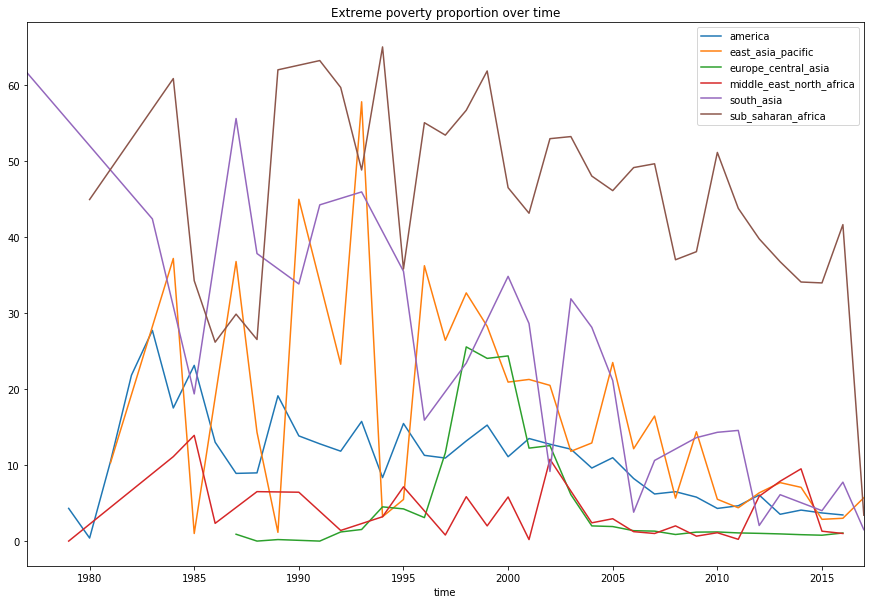

In [8]:
temp2 = temp_pov.set_index('time')
region_plot_obj = temp2.groupby('region')['extreme_poverty_percent_people_below_190_a_day'].plot(figsize = (15,10), legend = "True", title = "Extreme poverty proportion over time")

##### After grouping 161 countries into 6 regions they belong to, we can see that almost all of them have seen their extreme poverty rate almost halve.

In [9]:
import plotly.graph_objects as go
import plotly.express as px

## Problem 2

Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution
of income changes over time.

In [10]:
## Citation: https://plot.ly/python/choropleth-maps/

df_gdp = pd.read_csv(gp_path + 'ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
print(df_gdp['time'].min())
print(df_gdp['time'].max())

df_gdp['GEO'] = df_gdp['geo'].str.upper() 

for i in range(1800, 2040):
    gapminder = df_gdp.query("time=="+str(i))
    if len(gapminder) > 1:
    
        fig = px.choropleth(gapminder, locations="GEO",
                            title = str(i),
                            color="income_per_person_gdppercapita_ppp_inflation_adjusted",
                            hover_name="geo",
                            range_color = [0,67000],
                            color_continuous_scale=px.colors.sequential.Plasma)
        #fig.show()
        #break
        #fig.write_image("/Users/alefiyanaseem/Desktop/Data Visualization/gdp_images/images_" + str(i) + ".png")
    #break

1800
2040


Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that
trend?
What caveats apply to your conclusions?

The GDP has constantly gone up for all countries, thus also the continents. We can observe Europe and America has a higher GDP per capita, while GDP for Africa is on par with other countries in the 1950's. This can be attributed to the civil wars in the African countries being a major cause of their low GDP in today's day and age. Once can say that industrialization has helped the boost in GDP pver across all countries. Countries like Russia, China and South Asia are catching up with America and Europe in terms of GDP. Saudi Arabia experienced a large change in it's after the 1950's which one can attribute to the rise of oil industry.

## Problem 3

Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child
mortality over time. How does each measure change over time within each continent?

In [11]:
import seaborn as sns

In [12]:
child_mort = pd.read_csv(gp_path + "ddf--datapoints--under_five_mortality_from_cme_per_1000_born--by--geo--time.csv")

In [13]:
conts = []
for i, row in child_mort.iterrows():
#     print(row["country"])
#     print(i,child_mort[(child_mort["country"] == row["country"]) & (child_mort["time"] == row["year"])]["under_five_mortality_from_cme_per_1000_born"])
    try:
        conts.append(country_data[country_data["country"] == row["geo"]]["world_6region"].values[0])
        
    except:
        conts.append(0)

In [14]:
child_mort["continents"] = conts

In [15]:
# Same for gpdpercapita
gdp_percapita = pd.read_csv(gp_path + "ddf--datapoints--alternative_gdp_per_capita_ppp_pwt_7_1--by--geo--time.csv")

In [16]:
gdps = []
for i, row in child_mort.iterrows():
#     print(row["country"])
#     print(i,child_mort[(child_mort["country"] == row["country"]) & (child_mort["time"] == row["year"])]["under_five_mortality_from_cme_per_1000_born"])
    try:
        gdps.append(gdp_percapita[(gdp_percapita["geo"] == row["geo"]) & (gdp_percapita["time"] == row["time"])]["alternative_gdp_per_capita_ppp_pwt_7_1"].values[0])
        
    except:
        gdps.append(0)

In [17]:
child_mort["gdp"] = gdps

In [18]:
# Life expectancy
life_expectancy = pd.read_csv(gp_path + "ddf--datapoints--life_expectancy_years--by--geo--time.csv")

In [19]:
le = []
for i, row in child_mort.iterrows():
#     print(row["country"])
#     print(i,child_mort[(child_mort["country"] == row["country"]) & (child_mort["time"] == row["year"])]["under_five_mortality_from_cme_per_1000_born"])
    try:
        le.append(life_expectancy[(life_expectancy["geo"] == row["geo"]) & (life_expectancy["time"] == row["time"])]["life_expectancy_years"].values[0])
        
    except:
        le.append(0)

In [20]:
child_mort["life_exp"] = le

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



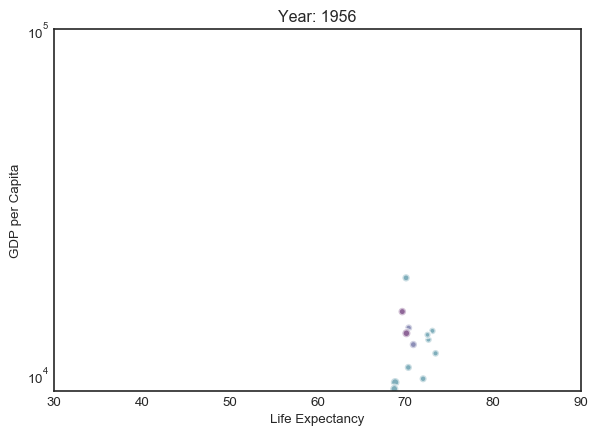

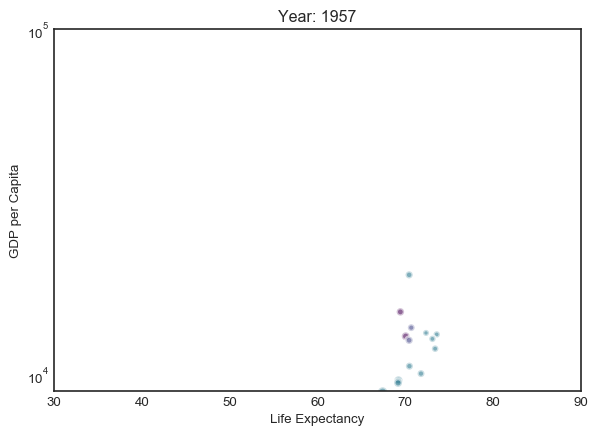

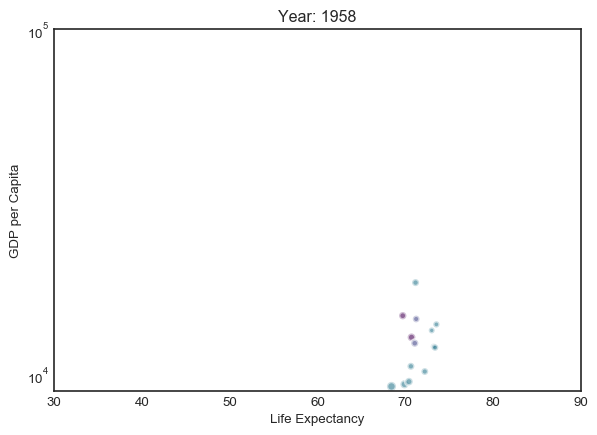

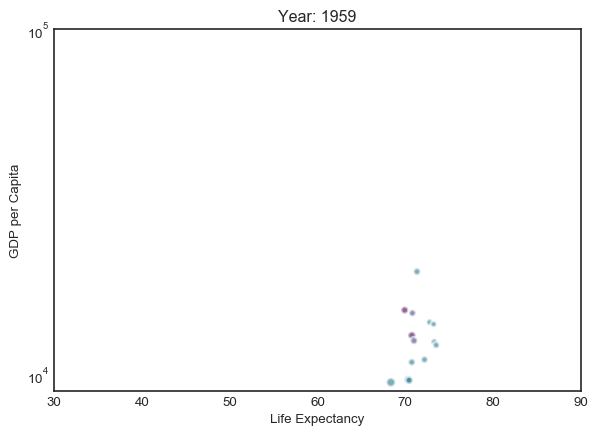

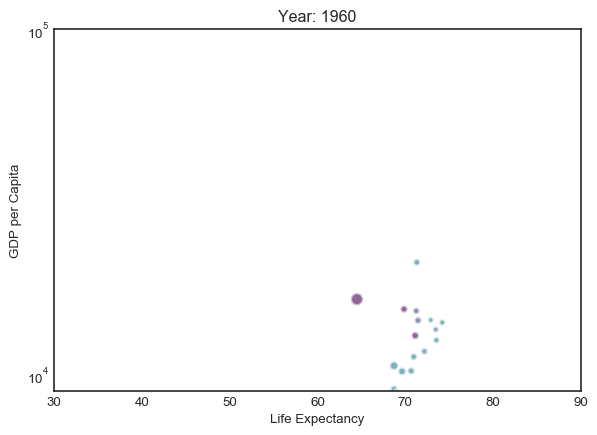

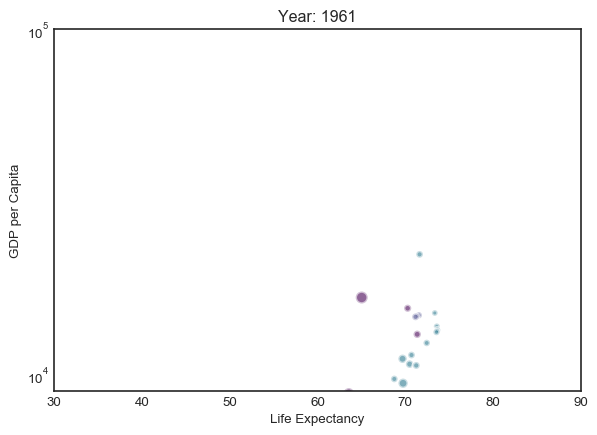

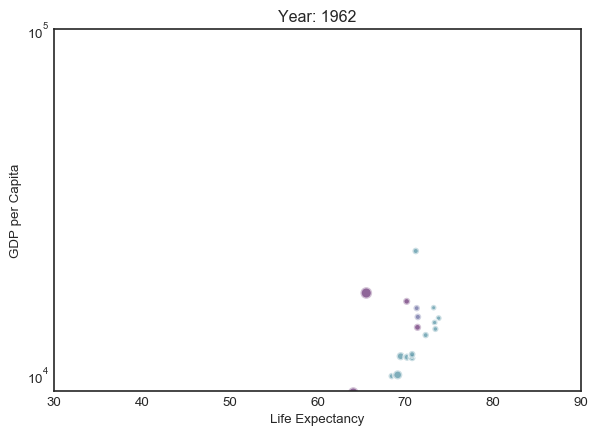

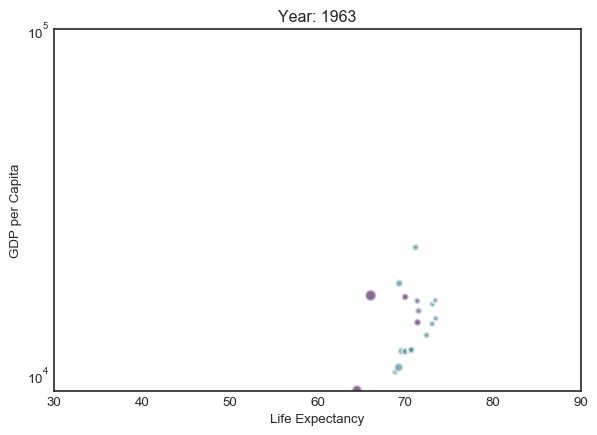

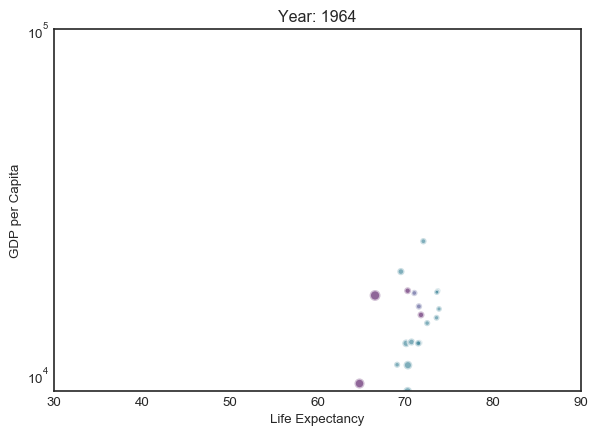

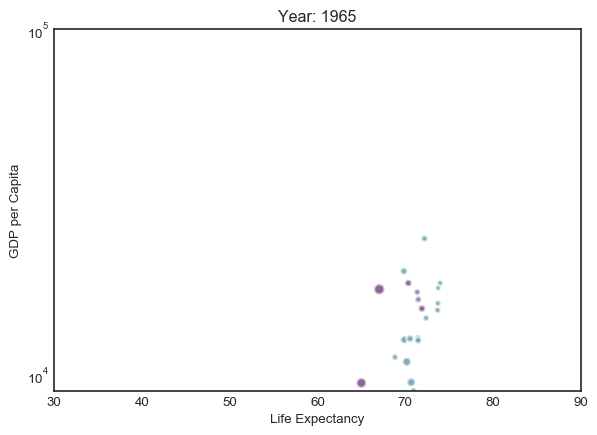

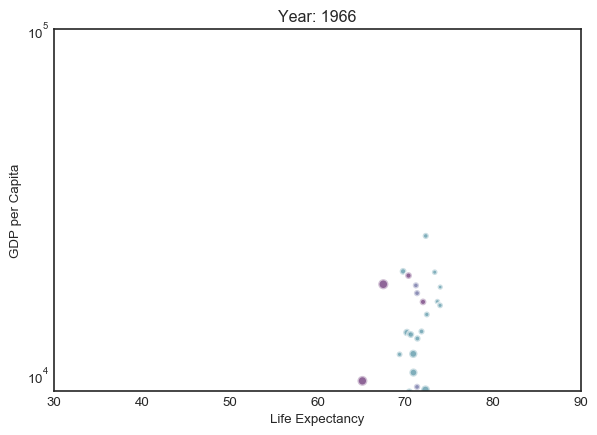

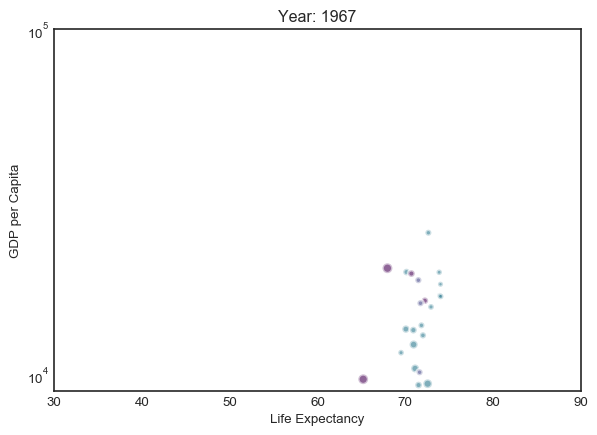

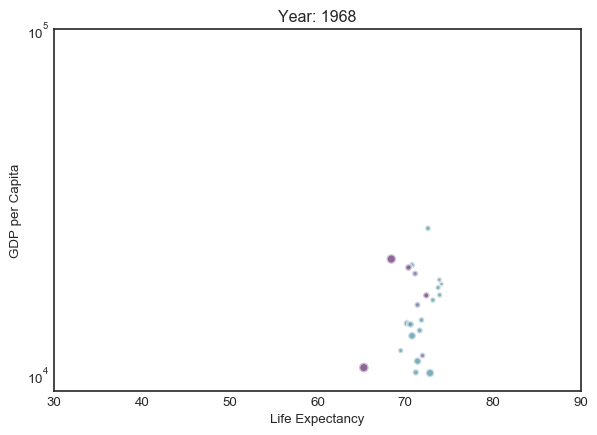

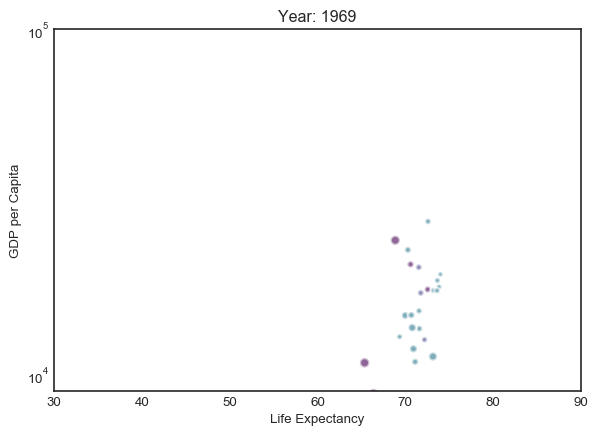

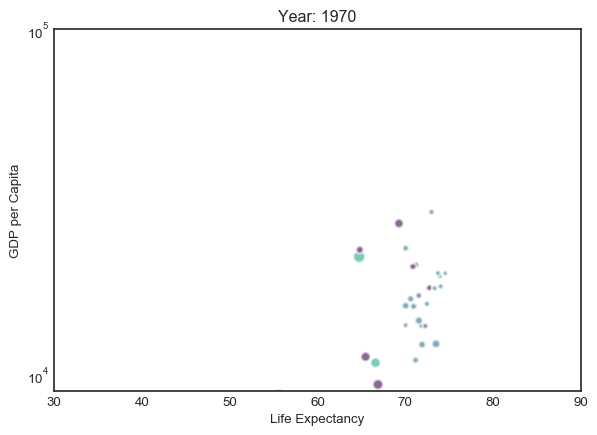

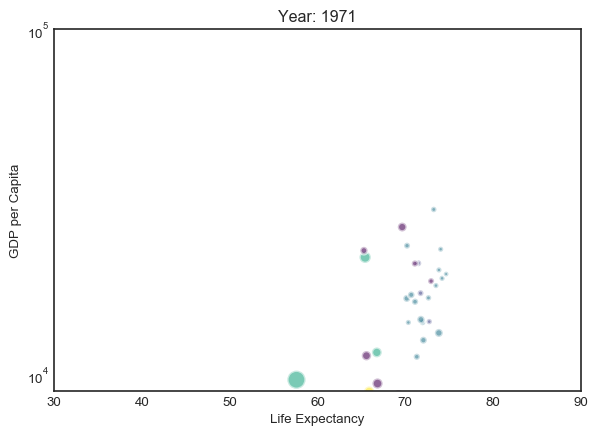

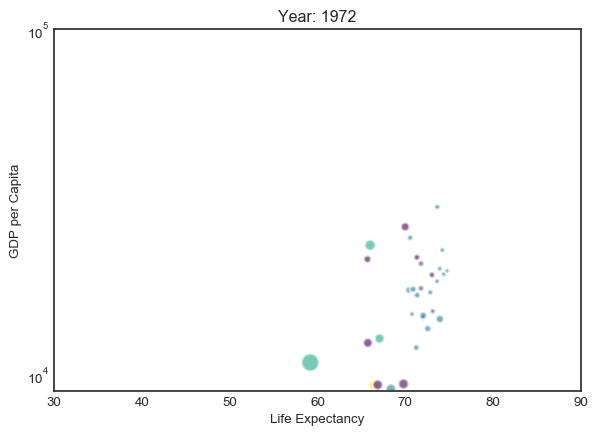

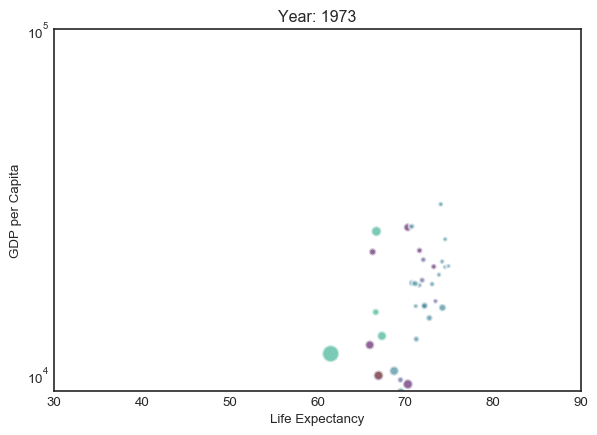

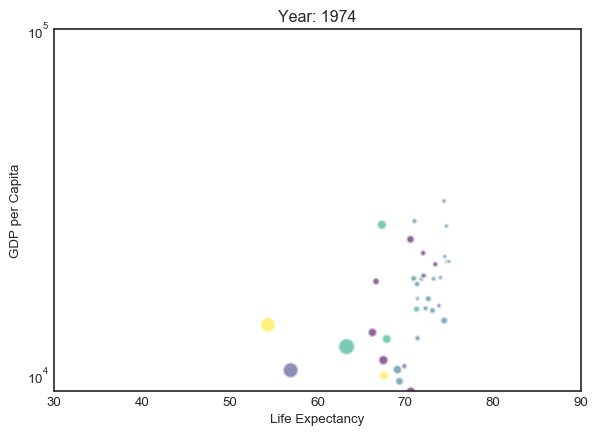

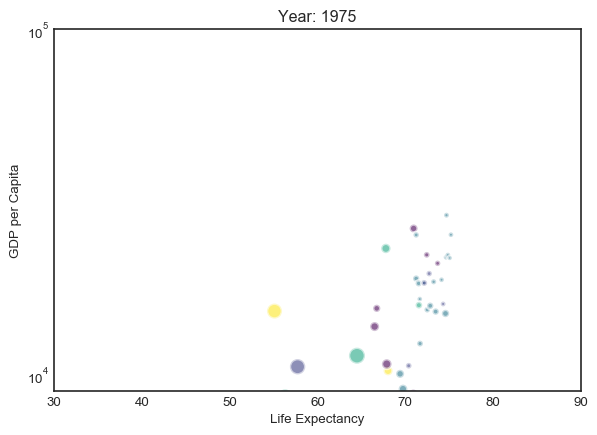

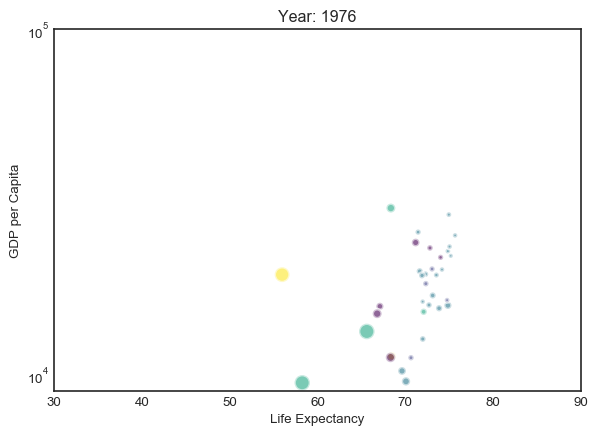

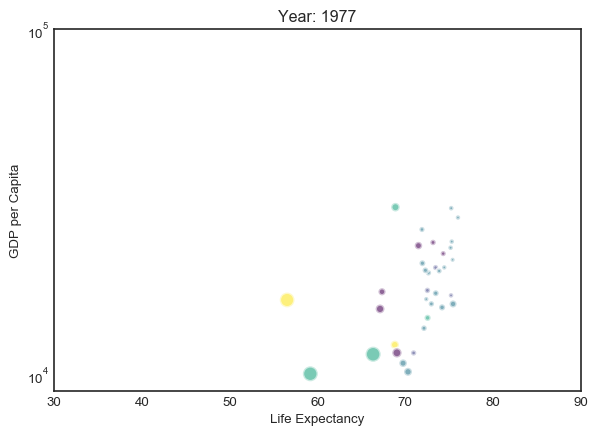

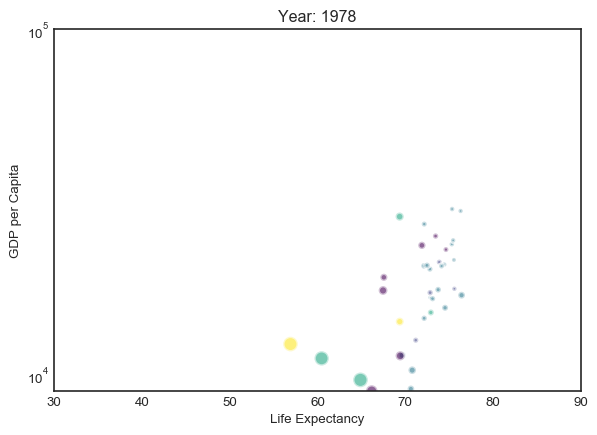

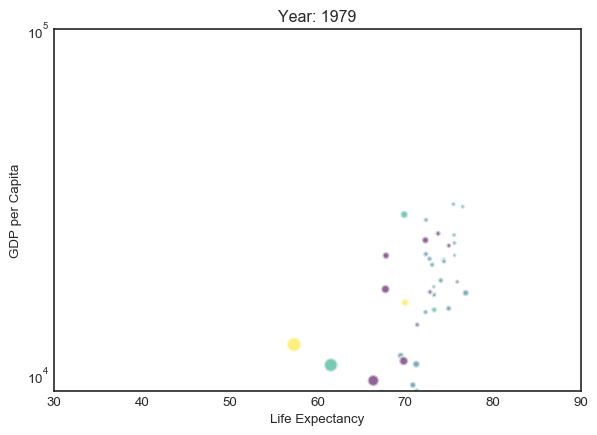

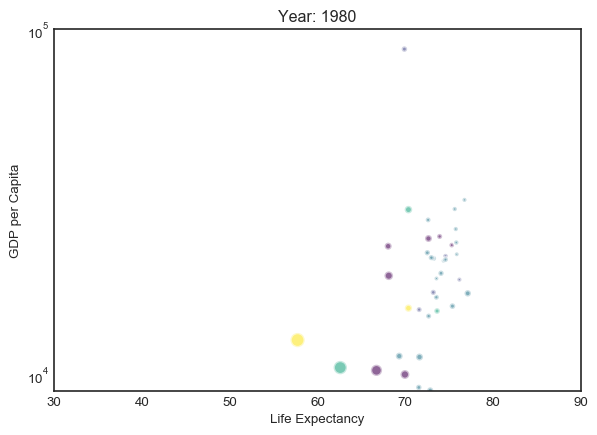

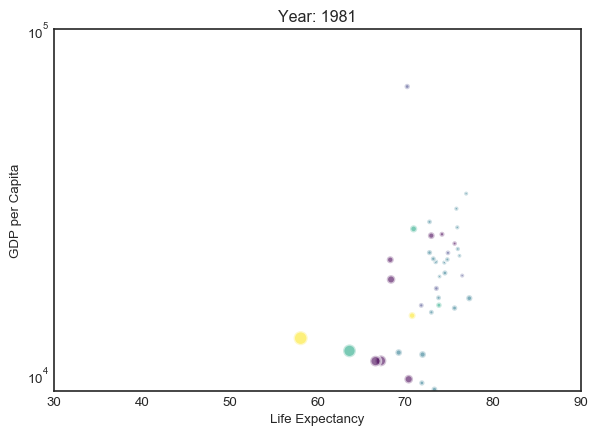

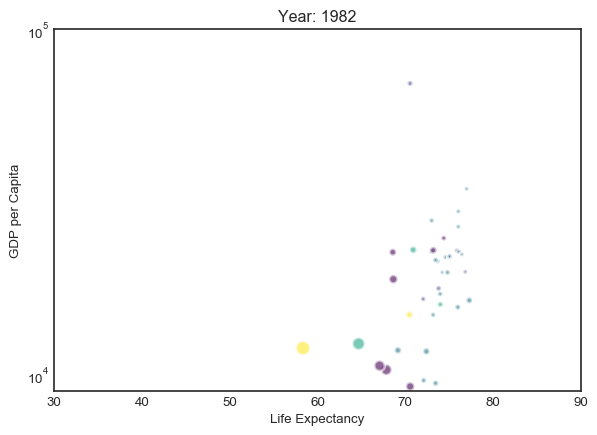

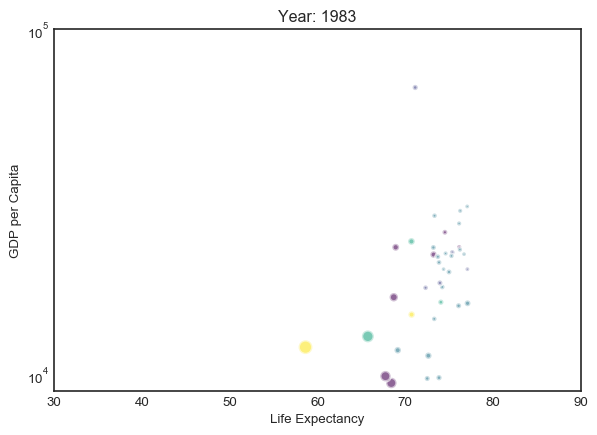

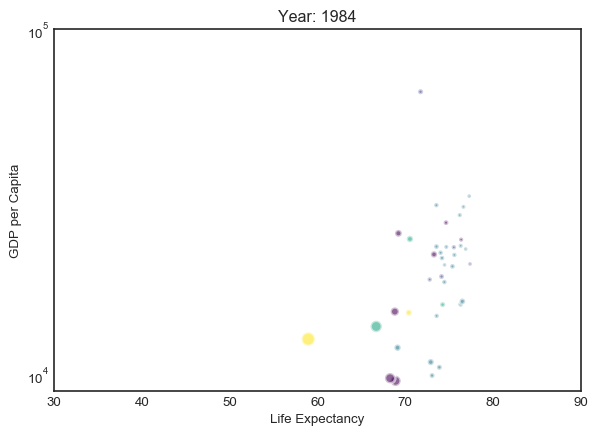

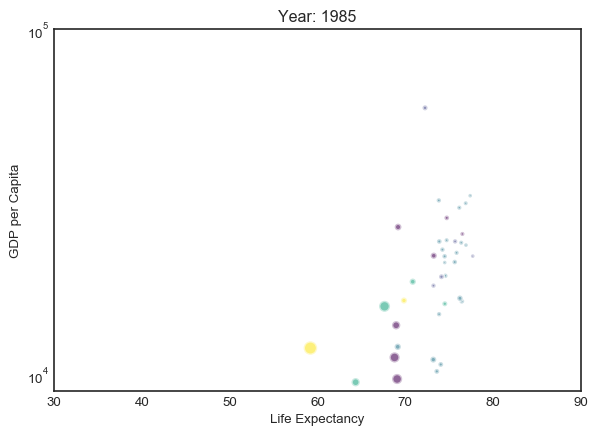

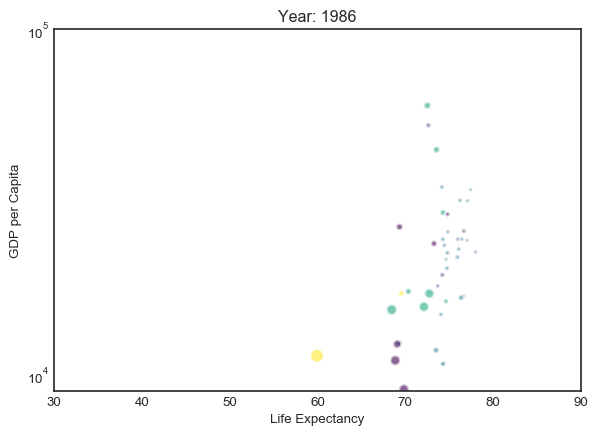

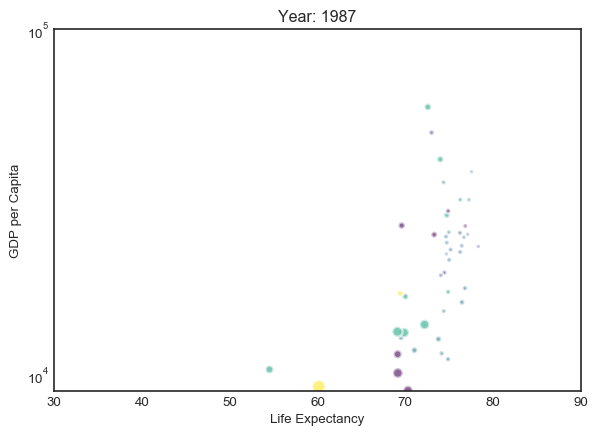

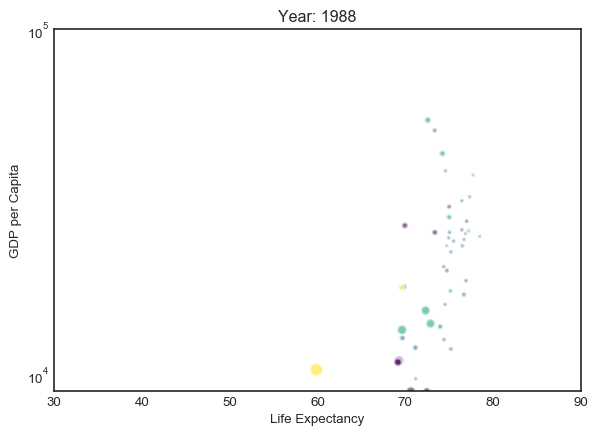

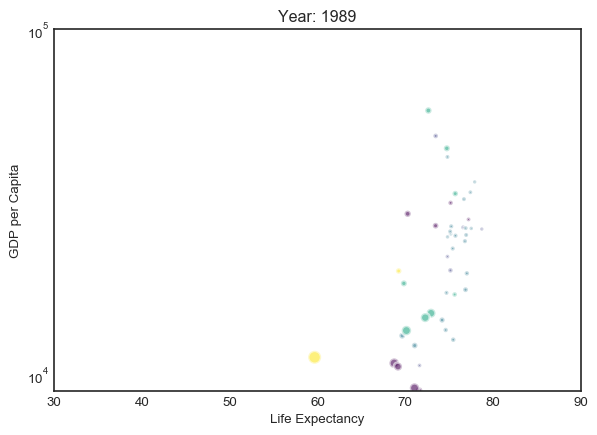

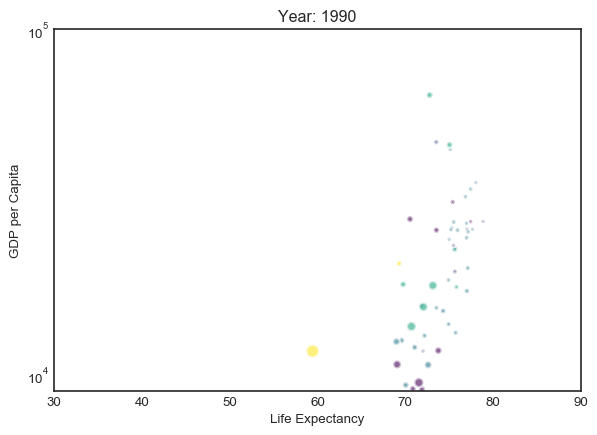

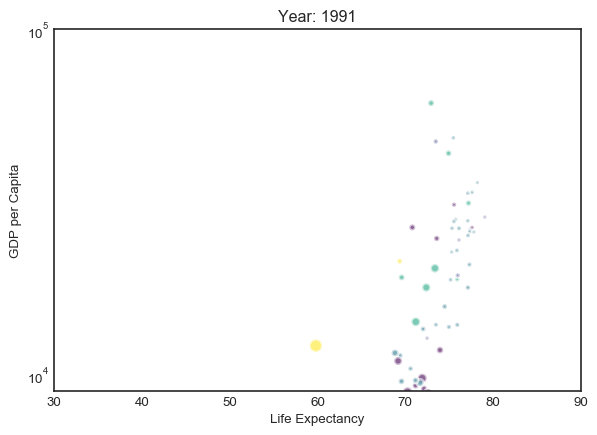

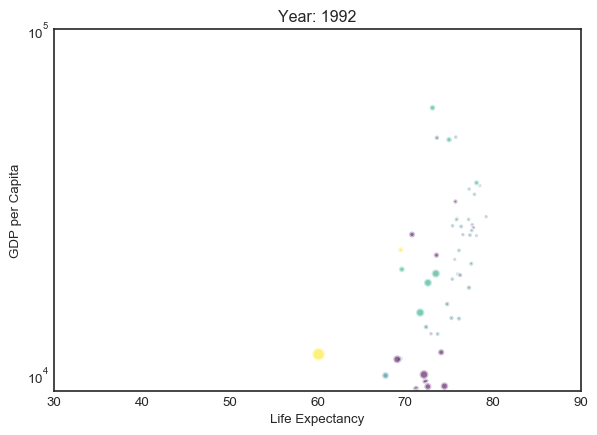

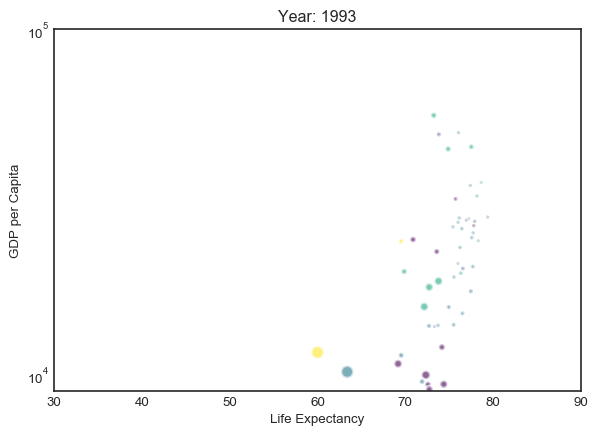

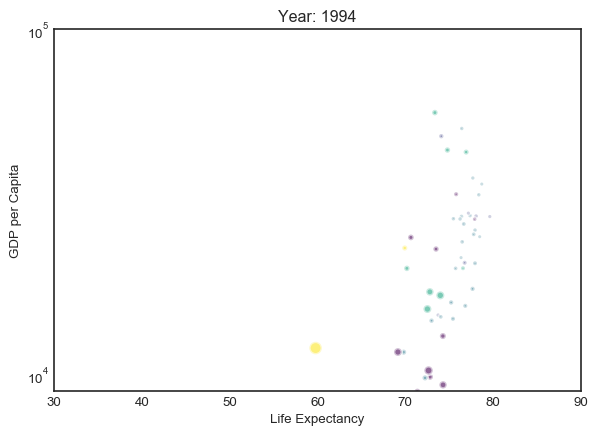

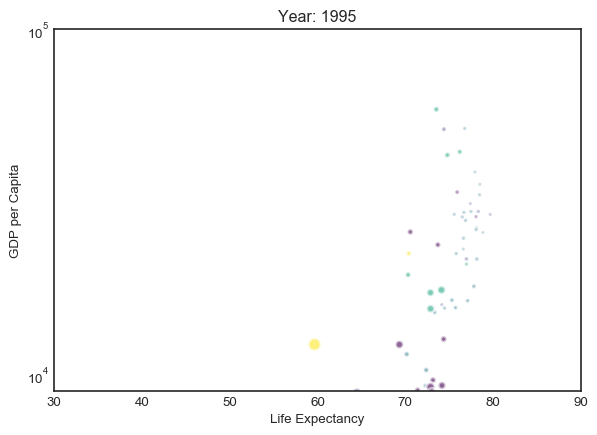

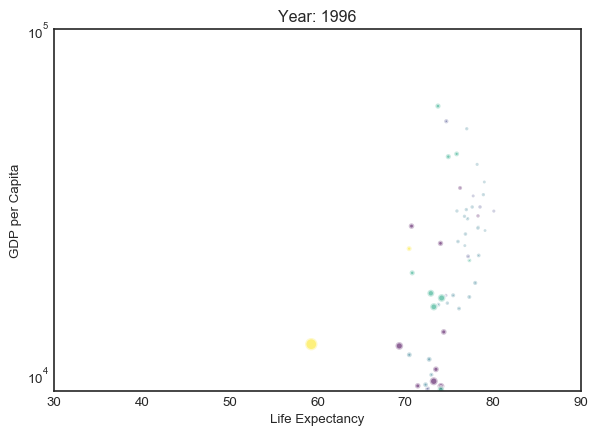

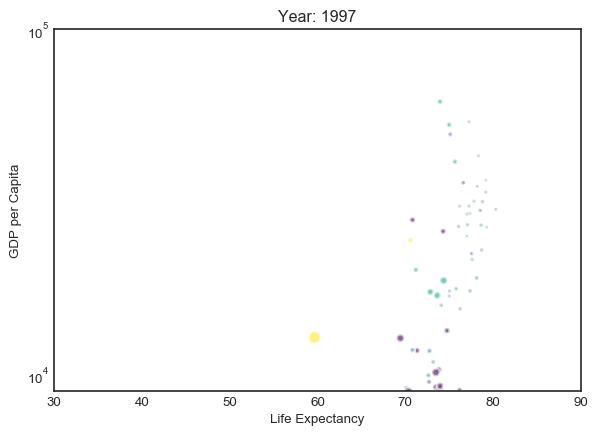

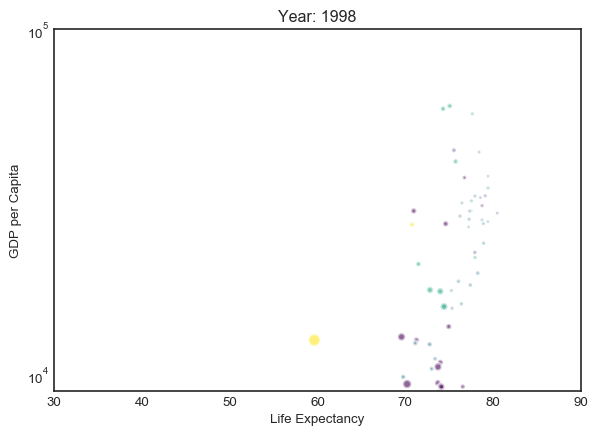

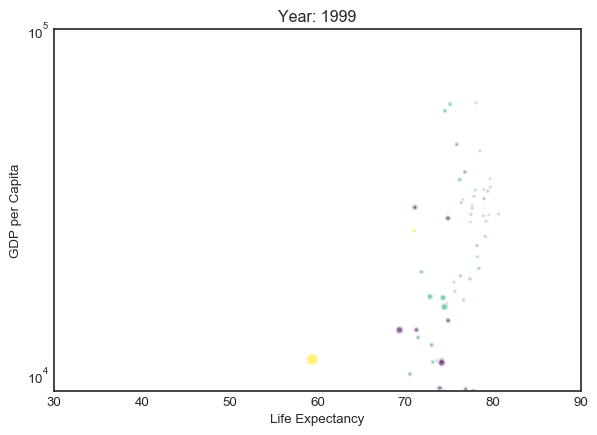

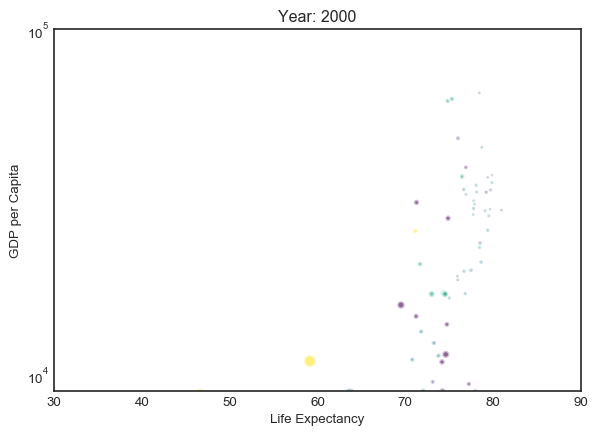

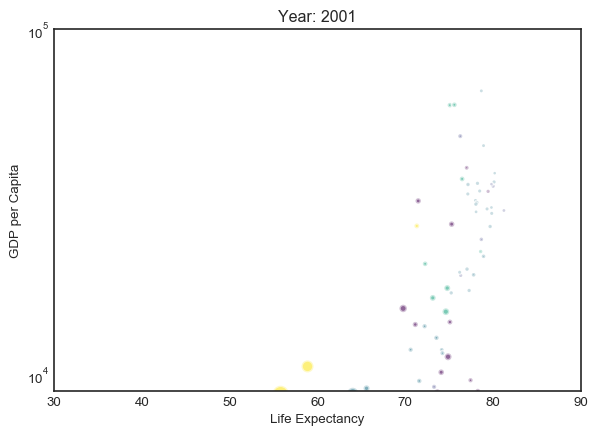

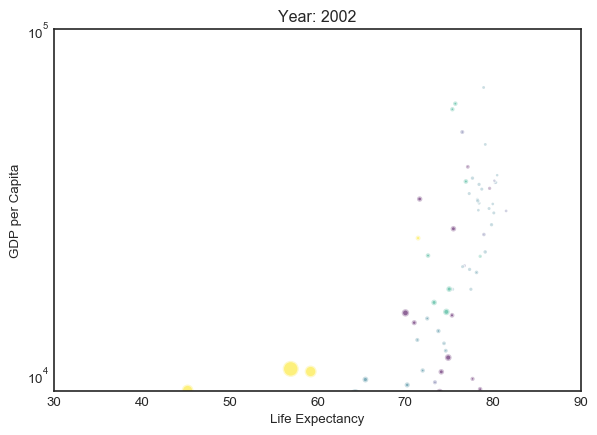

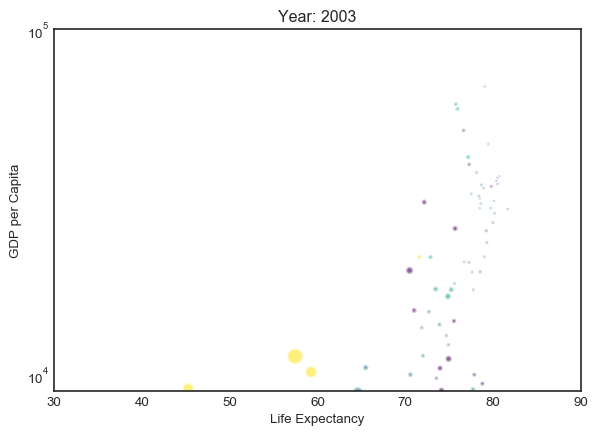

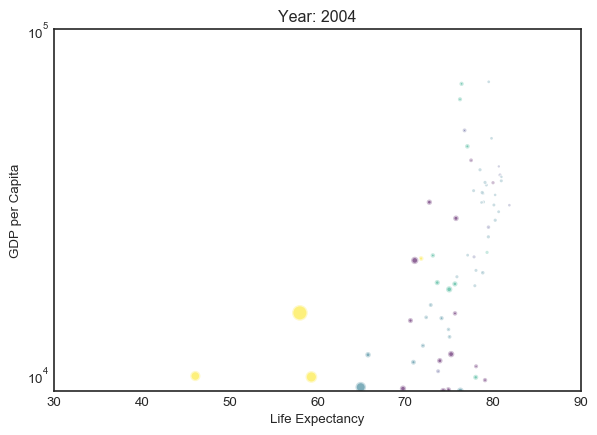

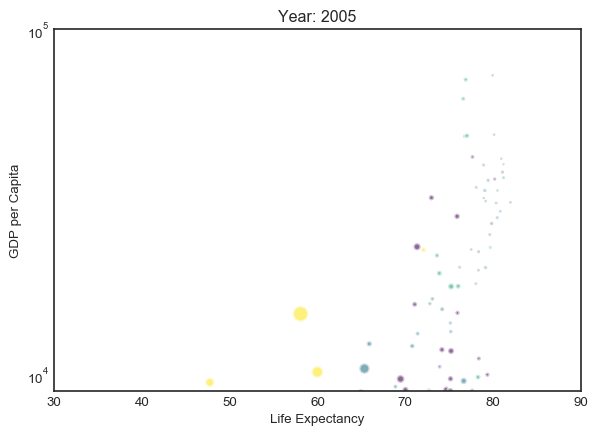

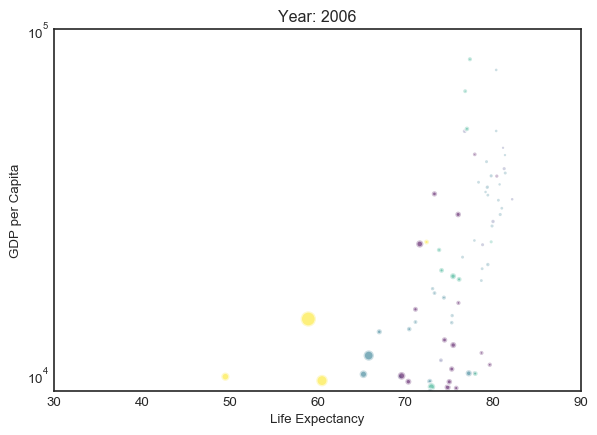

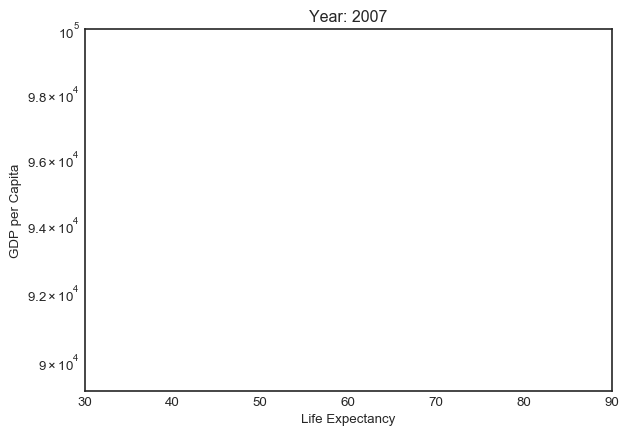

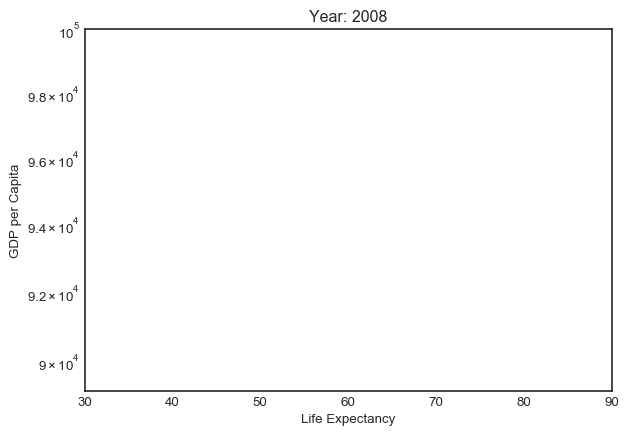

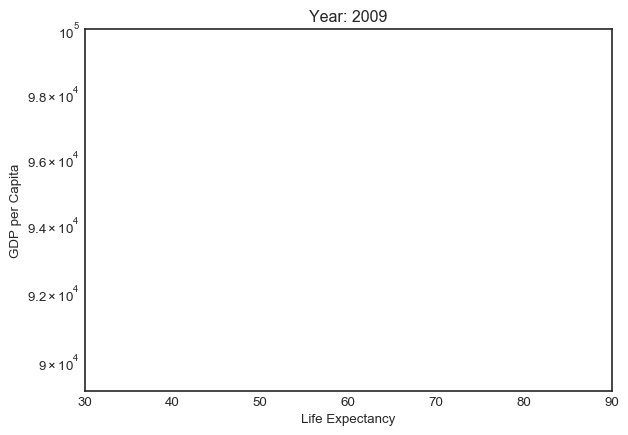

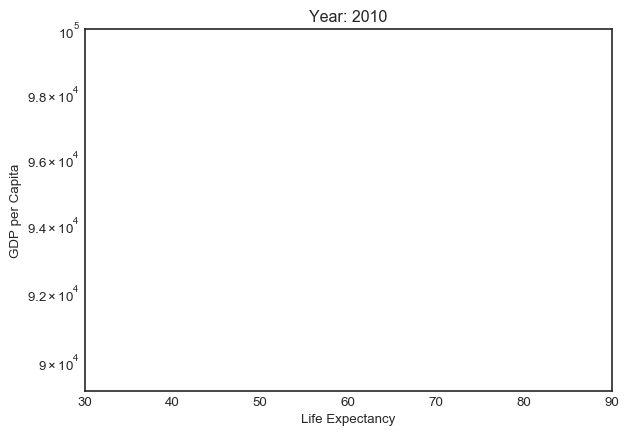

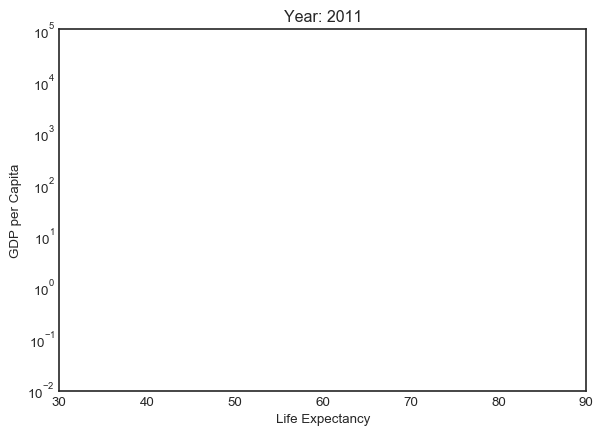

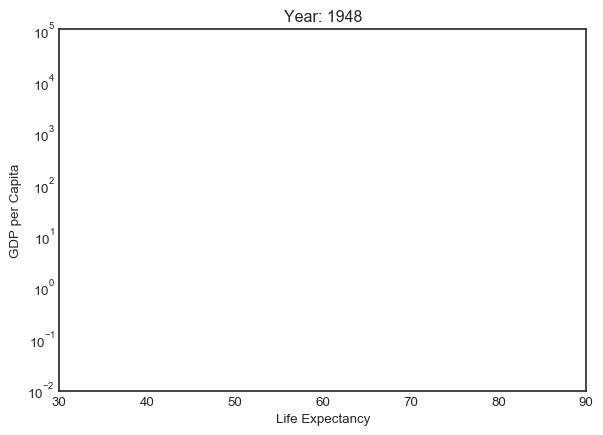

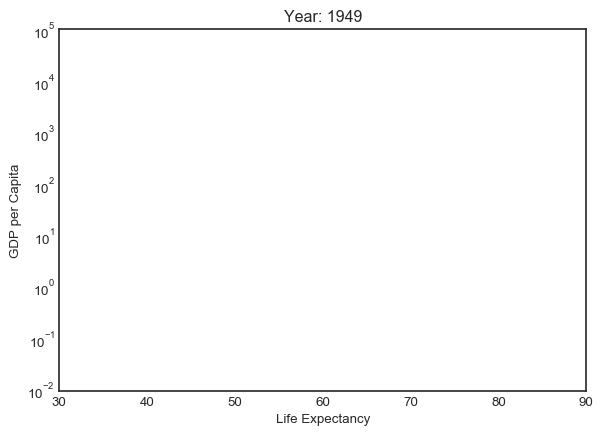

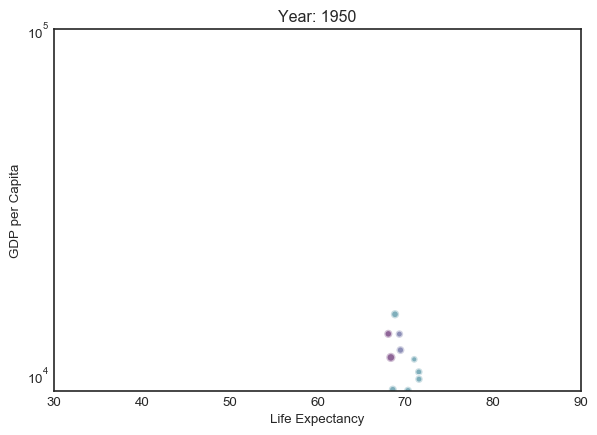

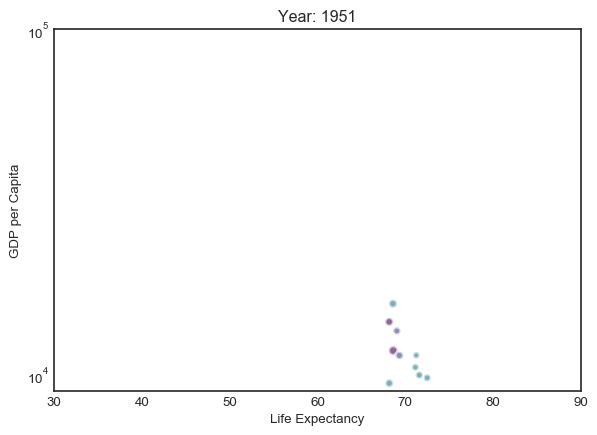

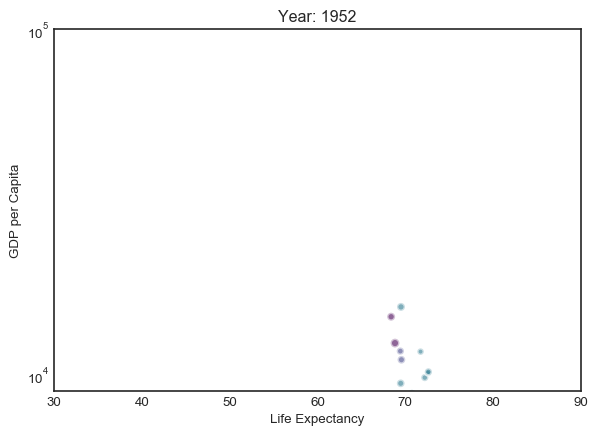

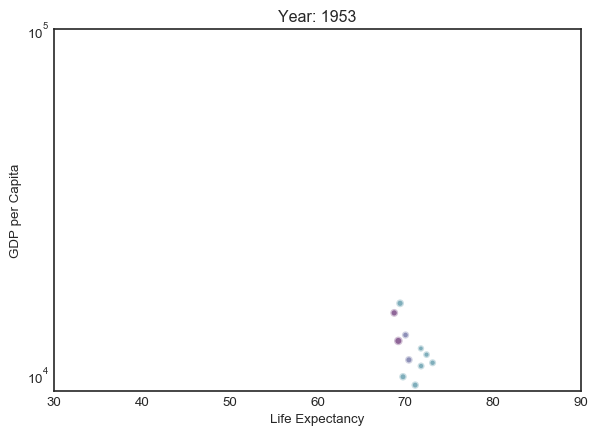

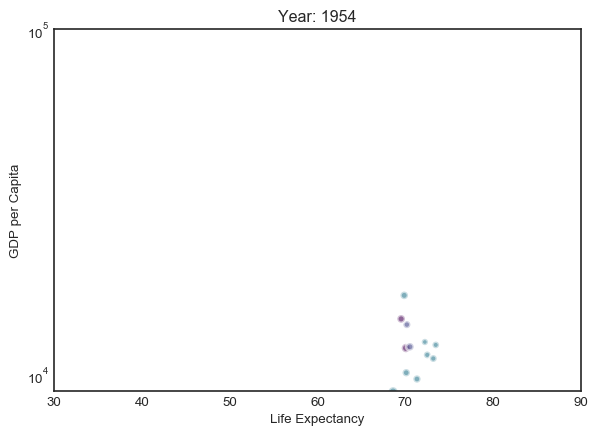

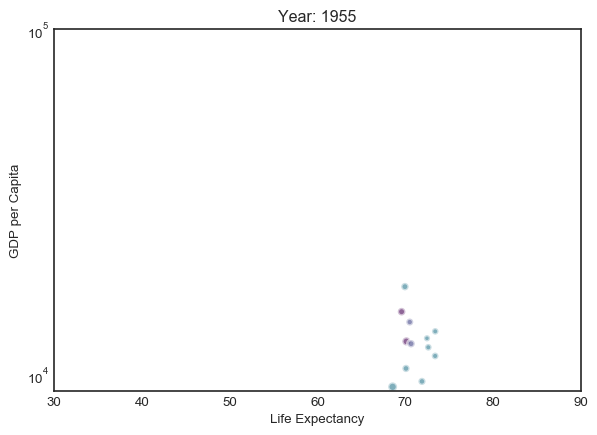

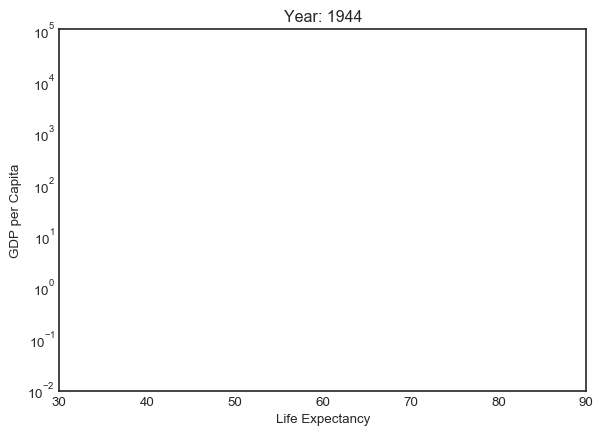

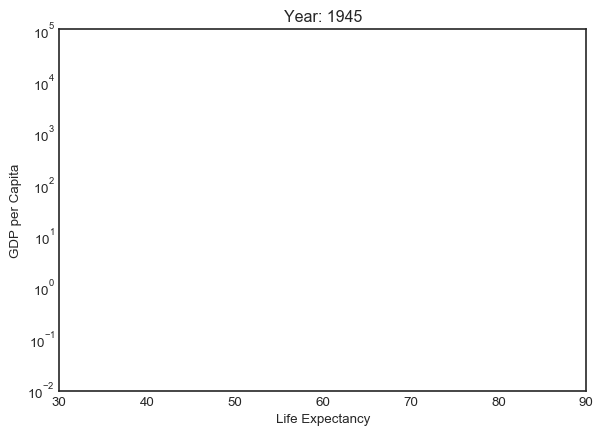

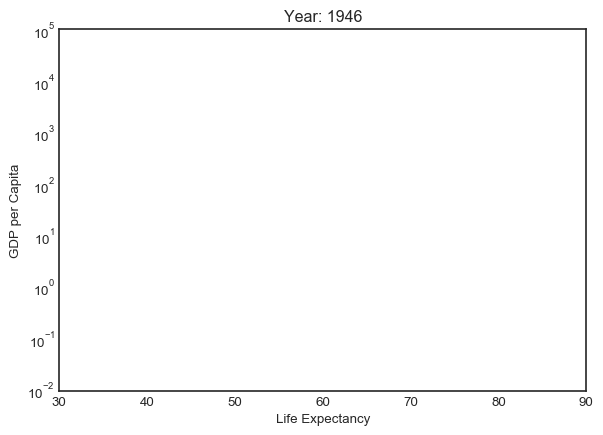

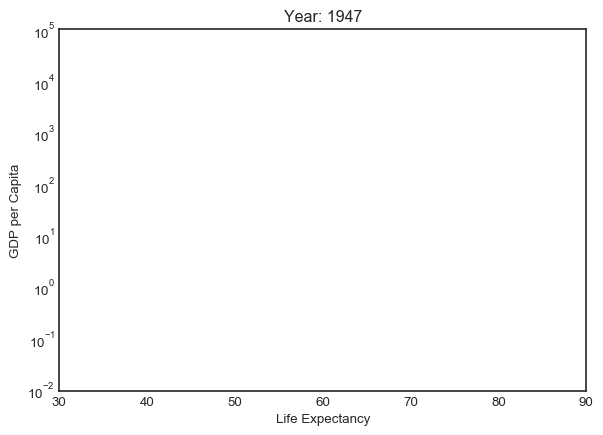

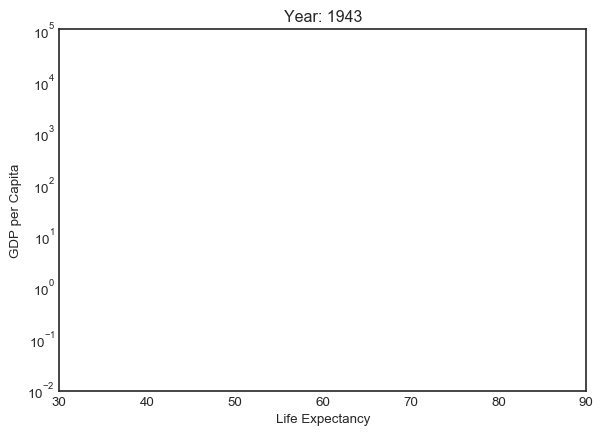

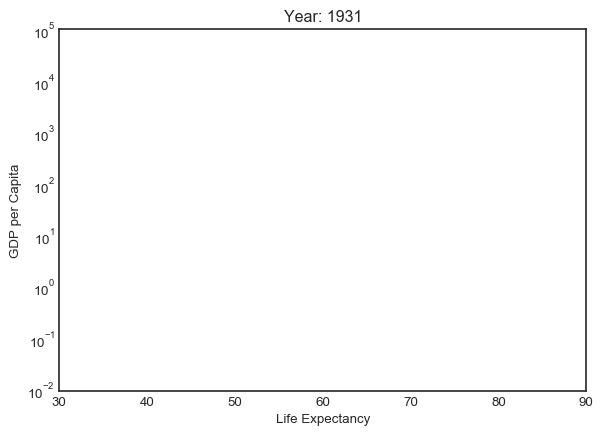

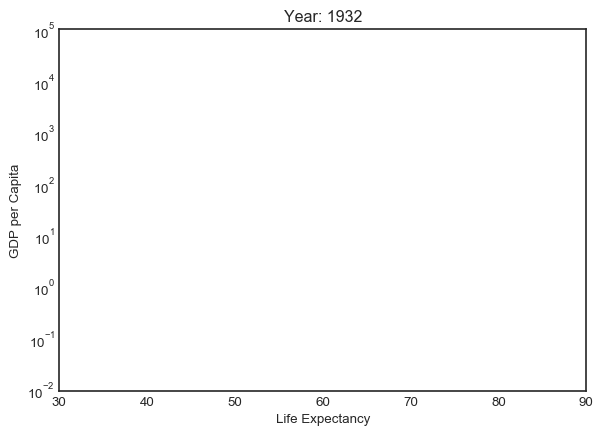

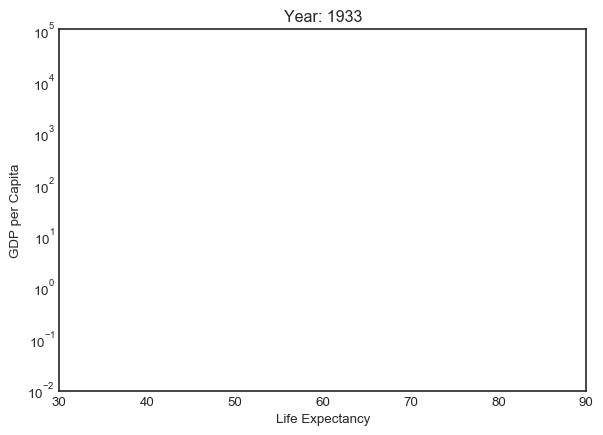

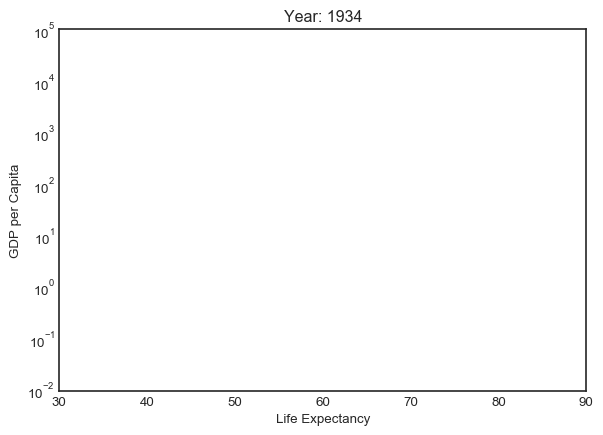

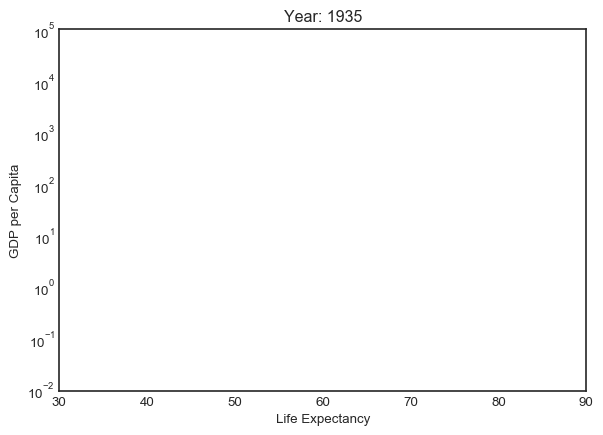

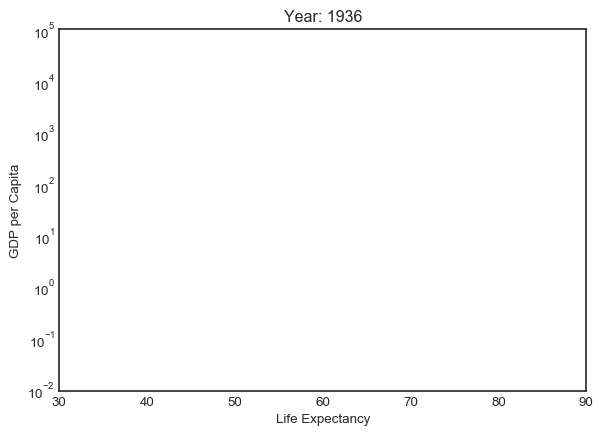

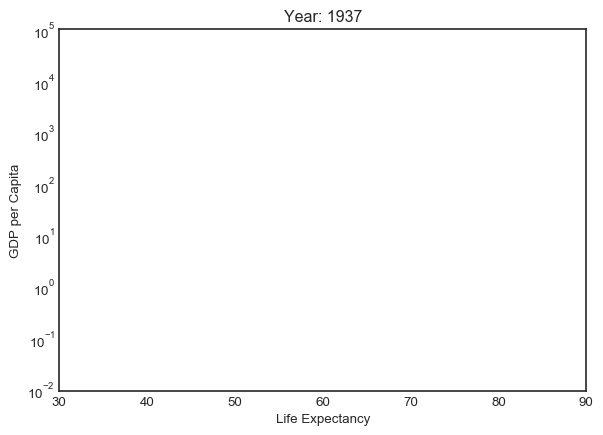

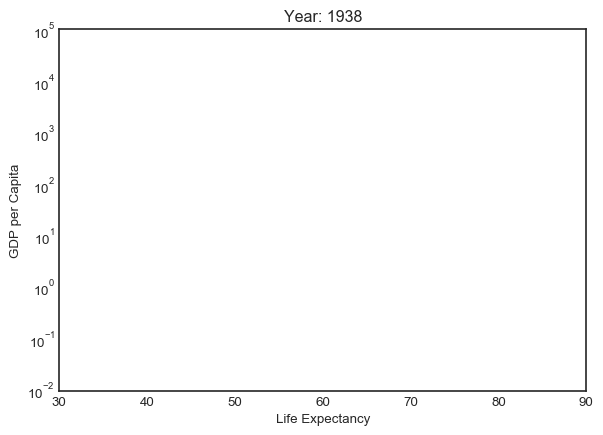

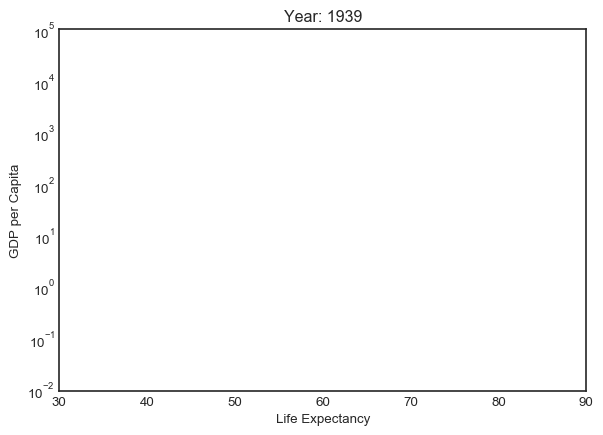

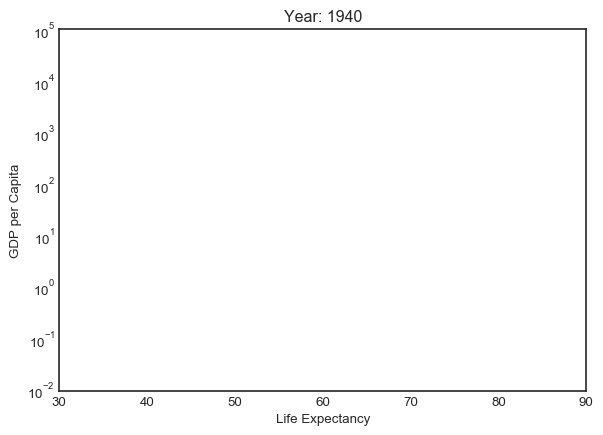

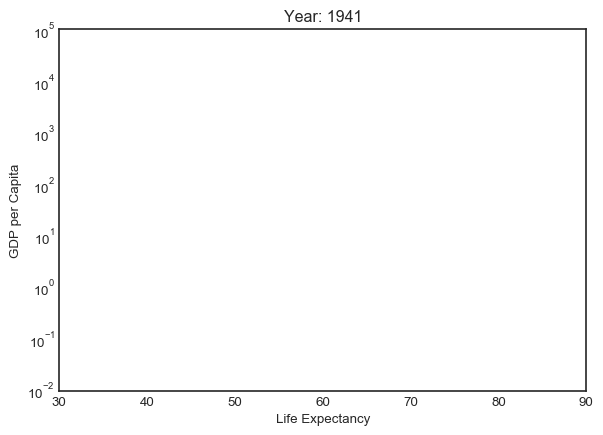

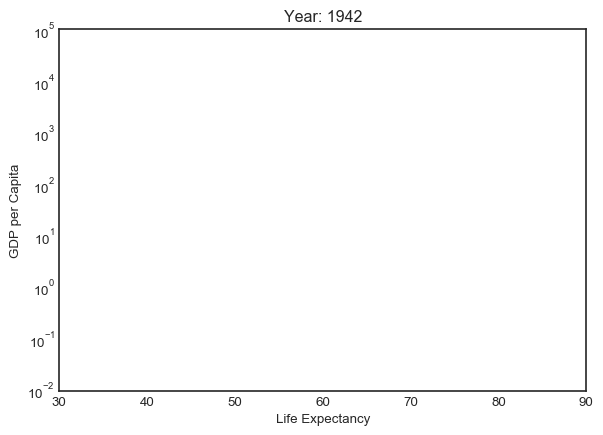

In [21]:
sns.set_style("white")
my_dpi=96

 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
child_mort['continents']=pd.Categorical(child_mort['continents'])
 
# For each year:
for i in child_mort.time.unique():
 
    # initialize a figure
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

    # Change color with c and alpha. I map the color to the X axis value.
    tmp=child_mort[ child_mort.time == i ]
#     print(tmp)
    plt.scatter(tmp['life_exp'], tmp['gdp'] , s=tmp['under_five_mortality_from_cme_per_1000_born'] , c=tmp['continents'].cat.codes, cmap="viridis", alpha=0.6, edgecolors="white", linewidth=2)

    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)
    # Save it
    #filename='/Users/alefiyanaseem/Desktop/Data Visualization/prob3_images/Gapminder_step'+str(i)+'.png'
    #plt.savefig(filename, dpi=96)
    plt.gca()


Life Expectancy remained almost stagnant for 100 years. We see a positive correlation between income, life expectancy and child mortality. Life expectancy gradually increased across all continents which explains the shift from left to right along x-axis. The shift of data upwards can be explained by the increase in income which can be seen in problem 2. Child mortality decreases over time and is much less in the areas of high income and life expectancy. Europe has the lowest child mortality per 1000 births. A drastic rise in GDP can be observed in Asia from 1950-1970. 

## Problem 4

Choose two variables you have not investigated yet, and visualize their distributions, their relationship with
each other, and how these change over time.

I wanted to see how malnourishment and child deaths of children under 5 years has been trending with an increase in gdp and income over the years. For this purpose I have used the icome per person dataset, malnutrition percent of children under 5 years and total population of children under 5 years and the geographic data to districute it.

In [22]:
df_gdp_pp = pd.read_csv(gp_path + "ddf--datapoints--income_per_person_long_series--by--geo--time.csv")
df_malnutrition = pd.read_csv(gp_path + "ddf--datapoints--malnutrition_weight_for_age_percent_of_children_under_5--by--geo--time.csv")
df_child_pop = pd.read_csv(gp_path + "ddf--datapoints--population_aged_0_4_years_total_number--by--geo--time.csv")
df_geo = pd.read_csv(gp_path + "ddf--entities--geo--country.csv")[['country','world_4region']]

In [23]:
#gdp_malnutrition = df_gdp_pp.merge(df_malnutrition)

gdp_mal = df_gdp_pp.merge(df_malnutrition, on=["geo", "time"])

gdp_malnutrition_pop = gdp_mal.merge(df_child_pop, on = ["geo", "time"])

# print(gdp_malnutrition_pop)

gdp_malnutrition_pop_geo = gdp_malnutrition_pop.merge(df_geo, left_on=["geo"], right_on=["country"]).sort_values(by = ["time"])



fig = px.scatter(gdp_malnutrition_pop_geo, x="income_per_person_long_series", y="malnutrition_weight_for_age_percent_of_children_under_5", 
                 animation_frame="time", animation_group="geo",
           size="population_aged_0_4_years_total_number", color="world_4region", hover_name="geo",
           log_x=True, size_max=55, range_x=[500,100000], range_y=[0,100])

fig.update_layout(title_text='Child Malnourishment vs GDP vs Child Population',
                  xaxis=dict(title='GDP per Capita'),
                  yaxis=dict(title='Malnourishmnet weight percent for children under 5'))

fig

Interpret your visualizations, noting any trends and/or outliers.

To get the above visulaization I have merged all the datasets due to which the data size reduced alot as the malnutrition dataset does not contain data for alot of years and for alot of the countries. One can see from the above visualization that the major geographic regions(continents) that have seen significant malnutrition are Africa and Asia. Even in these continents the percentage of children under 5 who face malnutrition has decreased over the years with an increase in GDP per capita. Even in Asia the major country facing malnutrition is India which could be attributed to the uneven rainfall that the region receives thus alot of the regions Like Vidarbha face droughts for years but one should not forget that India has a large population hence, the size of the bubble.